### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

Independent variable:

The variable being manipulated is the word color congruency. i.e. Whether or not the word denoting the color matches with the color of the font. For example, if "green" was written in green font then it would be *congruent*, if any other color is used then it will be denoted as *incongruent*.

Dependent variables: 

The time taken for participants to complete the congruent and incongruent tests. 

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

$H_0: \mu_{I} -  \mu_C \leq 0$

i.e. The null hypothesis is that the difference between the incongruent population mean  and congruent population mean times will be less than or equal to zero.

$H_1: \mu_{I} -  \mu_C > 0$

i.e. The alternative hypothesis is that the difference between the incongruent population mean  and congruent population times will be greater than zero. 

where:

In order to test this hypothesis, I will use a paired t-test. I am using a "paired" test because the people in the sample are the same in the congruent and incongruent tests, hence they are not completely independent. I am using the t-test instead of the z-test because the standard deviation for my population is unknown.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
%matplotlib inline

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# Import data
df = pd.read_csv('stroopdata.csv')

df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df['difference'] = df['Incongruent'] - df['Congruent']

In [4]:
# Get descriptive statistics
df.describe()

,Congruent,Incongruent,difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


Congruent test:
* $\bar{x}_C = 14.1$
* $s_C = 3.56$

Incongruent test:
* $\bar{x}_{I} = 22.0$
* $s_{I} = 4.80$

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

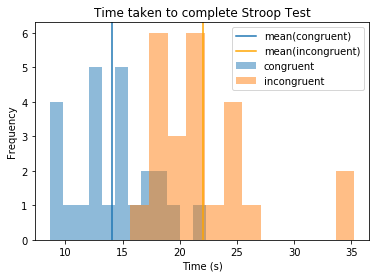

In [5]:
# Visualisation
plt.hist(x=df["Congruent"], label="congruent", alpha=0.5, bins=12)
plt.hist(x=df["Incongruent"], label="incongruent", alpha=0.5, bins=12)
plt.title("Time taken to complete Stroop Test")
plt.ylabel("Frequency")
plt.xlabel("Time (s)")
plt.axvline(14.1, label="mean(congruent)", )
plt.axvline(22.0, label="mean(incongruent)", color="orange")
plt.legend();

In [6]:
# Number of outliers
df[df["Incongruent"] > 30]

,Congruent,Incongruent,difference
14,18.200,35.255,17.055
19,12.369,34.288,21.919


It seems that there are a couple of outliers who took more than 30 seconds to complete the incongruent tests. This will skew the mean of the right.

The histogram does not make a very convincing bell-curve, which suggests that the sample size coupld probably be bigger.

It seems that generally, people take much longer to complete the incongruent test.

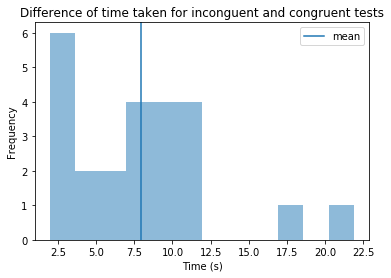

In [7]:
# Visualisation
plt.hist(x=df["difference"], alpha=0.5, bins=12)
plt.title("Difference of time taken for inconguent and congruent tests")
plt.ylabel("Frequency")
plt.xlabel("Time (s)")
plt.axvline(7.96, label="mean")
plt.legend();

Most people seem to take roughly 7.5 seconds longer on the incongruent test then on the congruent test. Though, there are a couple outliers who take much longer on the former than the latter. Most people probably take a second to learn not to look at the word but at the color, 6 people seem to be paticularly good at this!

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [8]:
# t-test

t_stat, p_value = stats.ttest_rel(a=df['Incongruent'],
                                  b=df['Congruent'])

t_stat, p_value

(8.020706944109957, 4.1030005857111781e-08)

In [9]:
# Confidence
H_0_rejection_confidence = 1-p_value

H_0_rejection_confidence

0.99999995896999416

With a p_value of roughly 4.10e-8, we can reject the null hypothesis with at least 99% confidence.

##  Conclusion

There seems to be enough evidence to reject the null hypothesis. It would seem that the stroop effect is a statistically significant phenomenon. Some people seem to cope with the effect better than others but this difference is pretty clear to see even when visualised using a histogram.